In [1]:
# Declaramos librerías
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import tree

In [2]:
# Creamos un conjunto de datos de clasificación
personajes = [{'Nombre': 'Bellatrix',    'Casa': 0, 'Valentía': 7, 'Maldad': 10},
              {'Nombre': 'Colagusano',   'Casa': 1, 'Valentía': 2, 'Maldad': 7},
              {'Nombre': 'Draco Malfoy', 'Casa': 0, 'Valentía': 4, 'Maldad': 7},
              {'Nombre': 'Dumbledure',   'Casa': 1, 'Valentía': 9, 'Maldad': 9},
              {'Nombre': 'Ginny',        'Casa': 1, 'Valentía': 8, 'Maldad': 2},
              {'Nombre': 'Harry Potter', 'Casa': 1, 'Valentía': 8, 'Maldad': 6},
              {'Nombre': 'Hermione',     'Casa': 1, 'Valentía': 10, 'Maldad': 4},
              {'Nombre': 'Lupin',        'Casa': 1, 'Valentía': 7, 'Maldad': 3},
              {'Nombre': 'McGonagall',   'Casa': 1, 'Valentía': 9, 'Maldad': 2},
              {'Nombre': 'Neville',      'Casa': 1, 'Valentía': 5, 'Maldad': 1},
              {'Nombre': 'Ron',          'Casa': 1, 'Valentía': 6, 'Maldad': 2},
              {'Nombre': 'Sirius',       'Casa': 1, 'Valentía': 9, 'Maldad': 1},
              {'Nombre': 'Snape',        'Casa': 0, 'Valentía': 10, 'Maldad': 5},
              {'Nombre': 'Umbridge',     'Casa': 0, 'Valentía': 5, 'Maldad': 10},
              {'Nombre': 'Voldemort',    'Casa': 0, 'Valentía': 10, 'Maldad': 10},
             ]

X = []
y = []
for personaje in personajes:
    X.append([personaje['Valentía'], personaje['Maldad']])
    y.append(personaje['Casa'])

print(X)
print(y)

[[7, 10], [2, 7], [4, 7], [9, 9], [8, 2], [8, 6], [10, 4], [7, 3], [9, 2], [5, 1], [6, 2], [9, 1], [10, 5], [5, 10], [10, 10]]
[0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0]


In [18]:
# Dividimos el conjunto de datos en entrenamiento y prueba
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [3]:
# Creamos el modelo de árbol de decisión
clf = DecisionTreeClassifier(random_state=10)
# max_leaf_nodes=3 (Cantidad máxima de hojas en cada nodo) 
# max_depth_3 (Profundidad máxma del árbol)

# Entrenamos el modelo
clf.fit(X, y)

DecisionTreeClassifier(random_state=10)

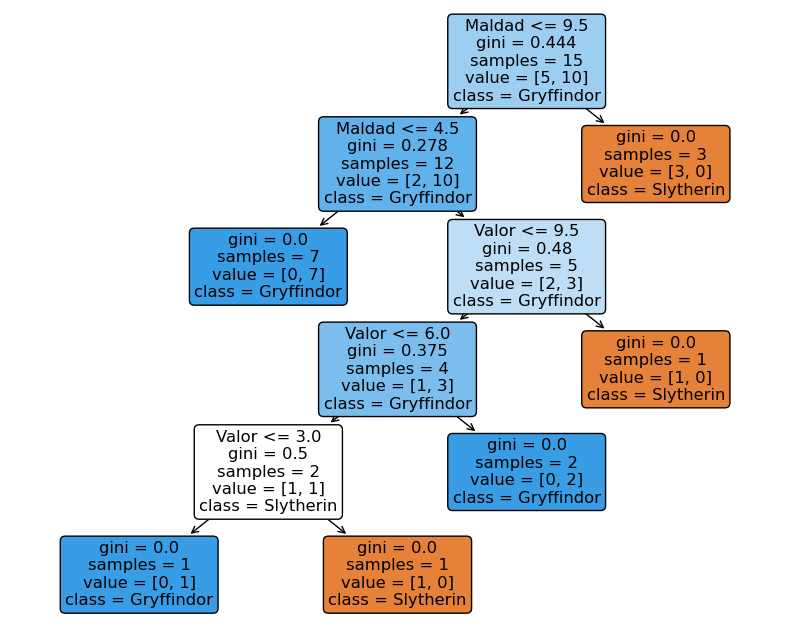

In [4]:
# Visualizamos el árbol de decisión
plt.figure(figsize=(10,8))
tree.plot_tree(clf, filled=True, rounded=True, class_names=["Slytherin", "Gryffindor"], feature_names=["Valor", "Maldad"])
plt.show()


In [26]:
# Función para trazar las regiones de decisión
import matplotlib.patches as mpatches

def plot_decision_regions(X, y, classifier, resolution=0.01):
    
    # plot the decision surface
    x1_min = 0
    x1_max = 11
    x2_min = 0
    x2_max = 11
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    custom_cmap = ListedColormap(['#008000', '#FFA500'])  # Verde y Naranja
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=custom_cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot all samples
    Sl_x, Sl_y, Gr_x, Gr_y = [], [], [], []

        # Plotea los datos, las etiquetas de las casas y agrega un título a cada punto
    for personaje in personajes:
        color = 'green' if personaje['Casa'] == 0 else 'orange'
        plt.scatter(personaje['Valentía'], personaje['Maldad'], color=color)
        plt.text(personaje['Valentía'] + 0.1, personaje['Maldad'] + 0.1, personaje['Nombre'], fontsize=9)

    sl_patch = mpatches.Patch(color='green', label='Slytherin')
    gr_patch = mpatches.Patch(color='orange', label='Gryffindor')
    plt.legend(handles=[sl_patch, gr_patch])


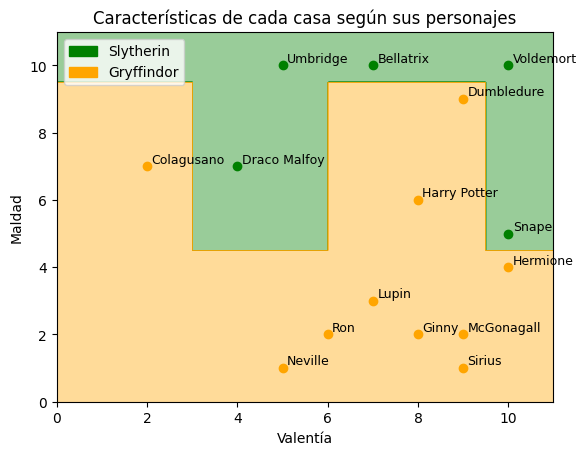

In [27]:
# Visualización de las regiones de clasificación
plot_decision_regions(X, y, classifier=clf)
plt.xlabel('Valentía')
plt.ylabel('Maldad')
# Agregar título
plt.title("Características de cada casa según sus personajes")
plt.show()

In [28]:
# Inferencia del modelo:
X_new = [[4, 5]]

# Realizar predicciones
y_pred = clf.predict(X_new)

print("Predicción", y_pred[0])

Predicción 0
